In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import lightgbm as lgb

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [2]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRyEOCFg3lv84x0rgwealMd1lLu9EmznbrZQZIpLfvvFRZv8CcCbbGs9Tff0L5HjaLXtoXlMTQ1rUkp/pub?output=csv'


df = pd.read_csv(url)


In [3]:
df.tail()

,ingresos_transaccion,grupo_canal,numero_visita,navegador,sistema_operativo,es_movil,categoria_dispositivo,subcontinente,fuente_trafico,medio_trafico,es_directo,cantidad_visitas,paginas_vistas,nuevas_visitas,mes,periodo_del_dia,dia_semana,y_pred_proba_class1
359,0,0.3,1,6.0,9.0,3,3.0,6.0,0.8,4.0,1.0,1,1,1,11,8,8,273
360,0,2.0,1,9.0,6.0,3,3.0,9.0,4.0,6.0,1.0,2,2,1,7,8,3,4779
361,0,2.0,1,9.0,6.0,3,3.0,0.4,4.0,6.0,1.0,2,2,1,2,7,8,632
362,0,0.3,1,5.0,6.0,3,3.0,0.1,0.8,4.0,1.0,1,1,1,1,8,6,23
363,0,0.3,1,6.0,9.0,3,3.0,0.1,0.8,4.0,1.0,1,1,1,11,7,10,272


In [4]:
# MinMaxScaler
scaler = MinMaxScaler()

# Escalar los datos del DataFrame
df_scaled = scaler.fit_transform(df)

# DataFrame a partir del array resultante
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [5]:
df_scaled.head(3)

,ingresos_transaccion,grupo_canal,numero_visita,navegador,sistema_operativo,es_movil,categoria_dispositivo,subcontinente,fuente_trafico,medio_trafico,es_directo,cantidad_visitas,paginas_vistas,nuevas_visitas,mes,periodo_del_dia,dia_semana,y_pred_proba_class1
0,0.041674,0.166667,0.000000,0.899497,0.875,1.0,1.0,1.0,0.296482,0.431818,0.0,0.080851,0.088816,1.0,0.454545,0.2,0.250,0.858150
1,0.736617,0.166667,0.041451,0.899497,0.875,1.0,1.0,1.0,1.000000,0.431818,1.0,0.061702,0.072368,0.0,0.636364,1.0,0.750,0.992898
2,0.017985,0.166667,0.010363,0.899497,0.875,1.0,1.0,1.0,0.296482,0.431818,1.0,0.036170,0.055921,0.0,0.454545,0.8,0.875,1.000000


In [6]:
# Separar la columna objetivo (y) del resto de las características (X)
X = df_scaled.iloc[:, 1:] # Todas las filas, todas las columnas excepto la primera
y = df.iloc[:, 0]   # Todas las filas, solo la primera columna

In [7]:
y.head(3)

0     31490000
1    556610000
2     13590000
Name: ingresos_transaccion, dtype: int64

In [8]:

# X son las características y y es la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:

# hiperparámetros
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'num_leaves': 10,
    'learning_rate': 0.034394681668452436,
    'max_depth': 3,
    'min_child_samples': 17,
    'subsample': 0.939758109968153,
    'colsample_bytree': 0.8484057097692045,
    'reg_alpha': 0.07960201361433986,
    'reg_lambda': 0.022974335270273885
}

# Crear el modelo LightGBM con los hiperparámetros proporcionados
model = lgb.LGBMRegressor(**params)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir
preds = model.predict(X_test)


In [20]:
# Calcular R^2
r2 = r2_score(y_test, preds)

# Calcular RMSE
rmse = mean_squared_error(y_test, preds, squared=False)

print("R^2:", np.round(r2, 6))
print("MSE:", np.round(rmse, 0).astype(int))

R^2: 0.467999
MSE: 83138678


In [21]:
print(y_test.max())

552500000


In [14]:

# Redondear los datos originales y las predicciones a cero decimales y convertirlos a enteros
y_test_rounded = np.round(y_test, 0).astype(int)
preds_rounded = np.round(preds, 0).astype(int)

# Diferencia entre los datos originales y las predicciones redondeadas
diferencia = y_test_rounded - preds_rounded

# DataFrame con los datos redondeados, predicciones redondeadas y diferencia
df = pd.DataFrame({'Datos Originales': y_test_rounded,
                   'Predicciones': preds_rounded,
                   'Diferencia': diferencia})

# Restablecer el índice del DataFrame
df.reset_index(drop=True, inplace=True)

df.sample(10)


,Datos Originales,Predicciones,Diferencia
33,0,6575846,-6575846
47,184050000,137072933,46977067
58,0,1352229,-1352229
11,44790000,38920803,5869197
44,5970000,37052277,-31082277
55,0,324476,-324476
7,59980000,24655215,35324785
12,0,18089406,-18089406
5,0,1564027,-1564027
67,17590000,134027840,-116437840


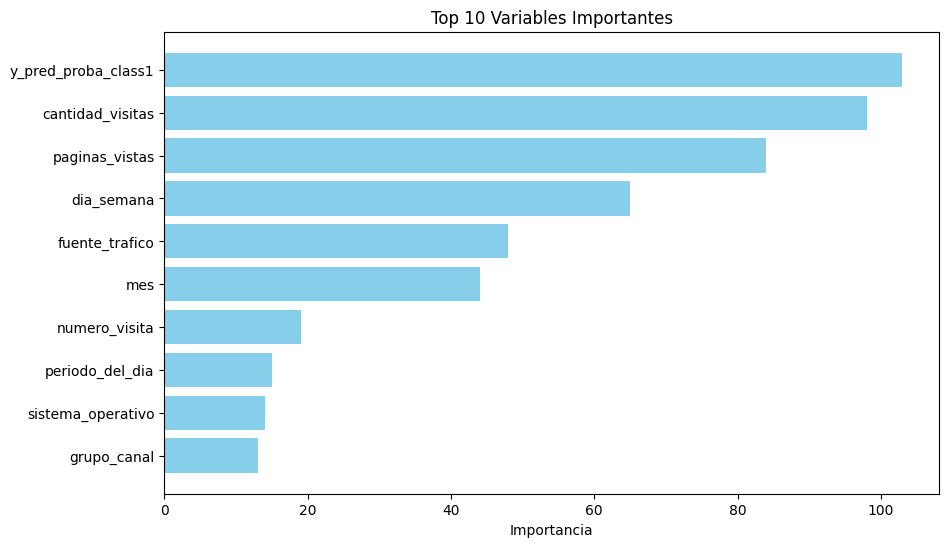

In [12]:
# Importancia de las características
feature_importance = model.feature_importances_

# Nombres de las características
feature_names = X_train.columns

# Diccionario con nombres de características e importancia
feature_importance_dict = dict(zip(feature_names, feature_importance))
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

# Top 10 características más importantes
top_10_features = list(sorted_feature_importance.keys())[:10]
top_10_importance = list(sorted_feature_importance.values())[:10]

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_10_features, top_10_importance, color='skyblue')
plt.xlabel('Importancia')
plt.title('Top 10 Variables Importantes')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la variable más importante en la parte superior
plt.show()